#### Importing libraries

In [21]:
import pandas as pd 
import numpy as np
import seaborn as sb

#### Importing data from Nasa meteor database and taking the first 60 data only the first two digits

In [22]:
data = pd.read_csv('Meteorite_Landings.csv', sep=',')
data = data.dropna()
data = data.head(60)
data = data['mass (g)']
data = data.astype(int).astype(str).str[:2].astype(int)
data

0     21
1     72
2     10
3     19
4     78
5     42
6     91
7     30
8     16
9     14
10    10
11    24
13    77
14    18
15    30
16    50
17    16
18    70
19    60
20    20
21    62
22    25
23    70
24    32
25    90
26    92
27    22
28    32
29    20
30    39
31    60
32    64
33    27
34    32
35    60
36    17
39    15
40    65
41    25
42    32
43    15
44    32
45    81
46    50
47    74
48    41
49    95
50    13
51    20
52    12
53    94
54    26
55    13
56    80
57    50
58    20
59    50
60    93
61    12
62    14
Name: mass (g), dtype: int64

In [23]:

mean = np.mean(data)
median = np.nanmedian(data)
moda = data.mode()[0]
max = np.max(data)
min = np.min(data)
amplitude = max - min
num_class = int(1 + np.log2(len(data)))
class_width = amplitude / num_class
ranges = np.arange(0, max+class_width, class_width)
ranges = [int(r) for r in ranges]
new_data = pd.cut(data, bins=ranges, include_lowest=True)
print(ranges)

[0, 14, 28, 42, 56, 70, 85, 99]


In [24]:
print("Mean:", mean)
print("Median:", median)
print("Moda: ", moda)
print("Max:", max)
print("Min:", min)
print("Amplitude:", amplitude)
print("Number of classes:", num_class)
print("Class width:", class_width)
print("Ranges:", ranges)

Mean: 42.233333333333334
Median: 32.0
Moda:  32
Max: 95
Min: 10
Amplitude: 85
Number of classes: 6
Class width: 14.166666666666666
Ranges: [0, 14, 28, 42, 56, 70, 85, 99]


In [25]:
freq_table = pd.crosstab(new_data, 'frecuency')
freq_table['relative frecuency'] = freq_table['frecuency'] / len(data)
freq_table['cumulative frecuency'] = freq_table['frecuency'].cumsum()
freq_table['cumulative relative frecuency'] = freq_table['relative frecuency'].cumsum()
freq_table


col_0,frecuency,relative frecuency,cumulative frecuency,cumulative relative frecuency
mass (g),,,,
"(-0.001, 14.0]",8,0.133333,8,0.133333
"(14.0, 28.0]",18,0.300000,26,0.433333
"(28.0, 42.0]",10,0.166667,36,0.600000
"(42.0, 56.0]",4,0.066667,40,0.666667
"(56.0, 70.0]",8,0.133333,48,0.800000
"(70.0, 85.0]",6,0.100000,54,0.900000
"(85.0, 99.0]",6,0.100000,60,1.000000


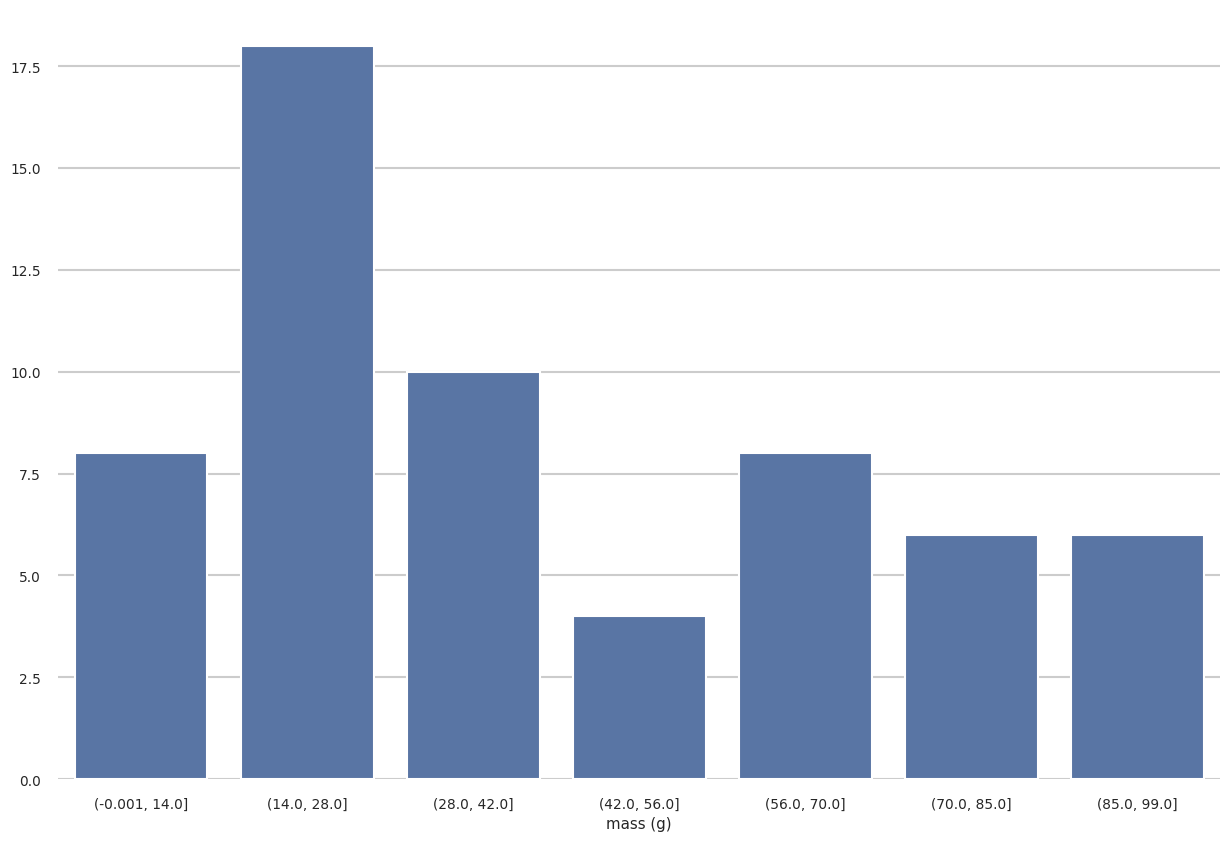

In [26]:
sb.barplot(x=new_data.value_counts().index, y=new_data.value_counts().values)
sb.set_theme(rc={'figure.figsize':(15, 10)})
sb.set_style('whitegrid')
sb.despine(left=True, bottom=True)
sb.set_context("talk", font_scale=0.6)


<Axes: xlabel='mass (g)', ylabel='Count'>

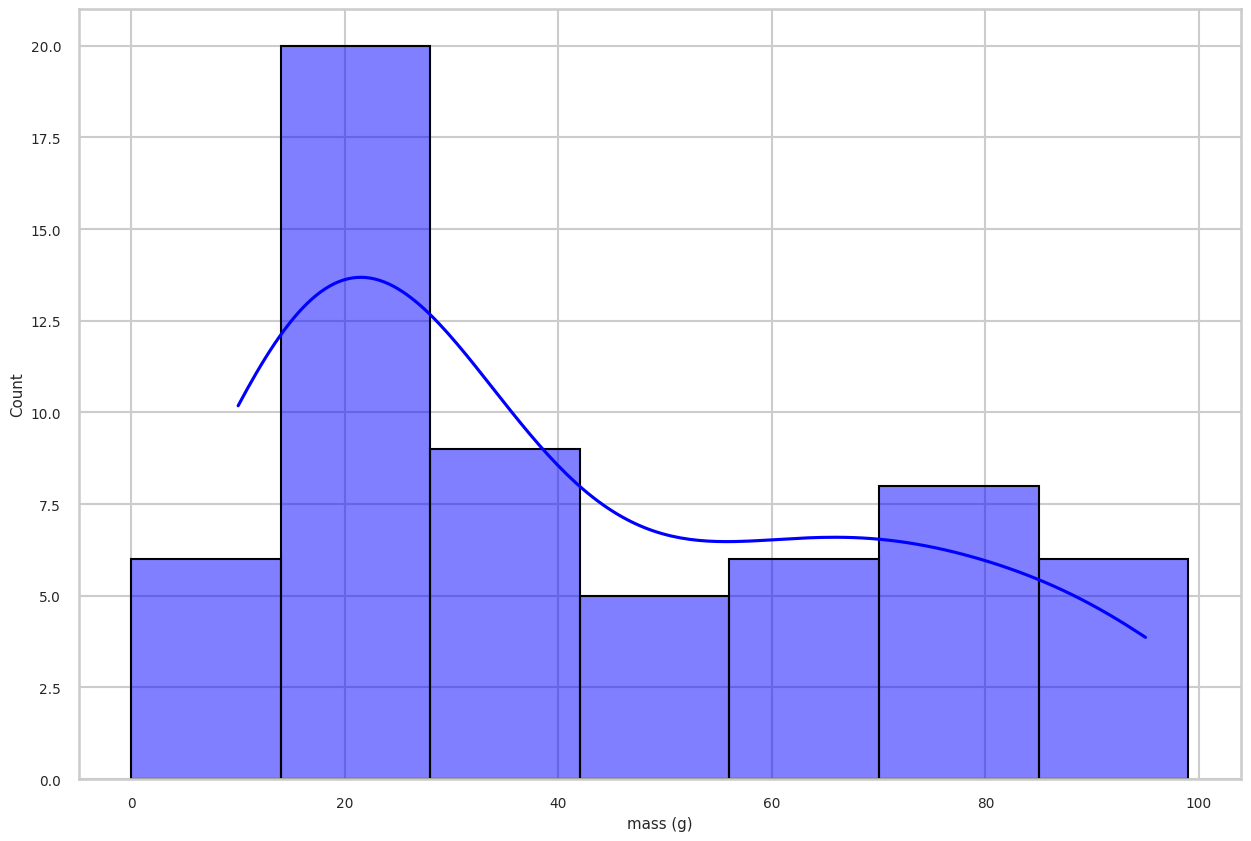

In [28]:
sb.histplot(data, bins=ranges, kde=True, color='blue', edgecolor='black')